In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from missingno import matrix

In [39]:
from pathlib import Path
DATA_PATH = Path() / "../data"
DATA_PATH.mkdir(parents=True,exist_ok=True)

def load_data(filename, data_path=DATA_PATH,encoding='ISO-8859-1'):
    csv_path = data_path / filename
    return pd.read_csv(csv_path,encoding=encoding)

def save_data(data, filename, data_path=DATA_PATH,encoding='ISO-8859-1'):
    csv_path = data_path / filename
    data.to_csv(csv_path, index=False,encoding='ISO-8859-1')

PLOT_PATH = Path() / "../plot"
PLOT_PATH.mkdir(parents=True,exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300, transparent=True):
    path = PLOT_PATH / f"{fig_id}.{fig_extension}"
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution, transparent=transparent)

In [40]:
import os
print(os.getcwd())


c:\Users\TYS\Documents\study\Master\INSY669 Text Analytics\individual assignment\ADZUNA-FEATURED-PREDICTION-COMPETITION\src


In [41]:
from pathlib import Path
file_path = Path("../data/Train_rev1.csv")
print(file_path.exists())


True


In [42]:
df = load_data("Train_rev1.csv")
sub_df = df.sample(n=7500, random_state=42)  # Adjust random_state for reproducibility
sub_df

,Id,Title,FullDescription,LocationRaw,LocationNormalized,ContractType,ContractTime,Company,Category,SalaryRaw,SalaryNormalized,SourceName
30390,68062598,Business Account Manager,Business Account Manager Plumbing Heating Pro...,South West,South West London,NaN,permanent,BMS Sales Specialists,Sales Jobs,"22000 - 25000 per annum + Car,Mobile,Pension,L...",23500,totaljobs.com
108709,69622111,Staff Nurse RGN/RMN Newtown Abbey Nights Ne...,Job Title; Staff Nurse RGN/RMN â NightsLocat...,Newtownabbey,Newtownabbey,full_time,NaN,Regional Recruitment Services,Healthcare & Nursing Jobs,12.00/Hour,23040,staffnurse.com
13924,66664026,Community Fundraising Manager,This dynamic international development charity...,London,London,full_time,permanent,TPP Not for Profit,Charity & Voluntary Jobs,33300 - 36400 per annum,34850,Third Sector Jobs
154606,71015241,Conveyancing Executive,Large regional law firm require a residential ...,Hampshire,Hampshire,full_time,permanent,PTP Consulting,Legal Jobs,"From 18,000 to 27,000 per year",22500,TotallyLegal
172891,71428553,Investment Compliance Analyst,This individual will work closely with the bus...,London South East,South East London,NaN,permanent,Michael Page Financial Services,Accounting & Finance Jobs,50000 to 60000 per annum,55000,totaljobs.com
...,...,...,...,...,...,...,...,...,...,...,...,...
123601,69961134,ECE Borestone Primary School,****8 hours per weekTemporary Until 28th June ...,Stirling,Stirling,part_time,NaN,Stirling Council,Teaching Jobs,"18,981.00 - 20,163.00 per year Pro rata",19572,Jobcentre Plus
244759,72705205,TEACHER OF BUSINESS STUDIES AND ICT,Position: Qualified Teacher Subject/Specialism...,Swindon,Swindon,NaN,contract,NaN,Teaching Jobs,450 - 500 per week,22800,hays.co.uk
61247,68695649,Trades and Labour Recruitment Consultant,Trades and Labour Recruitment Consultant Romfo...,"Romford, Essex Essex South East",UK,NaN,permanent,Shadow UK,Other/General Jobs,"From 20,000 to 25,000 per annum Depending on E...",22500,totaljobs.com
86701,69097668,Immigration Advisor,Job purpose: Helps foreign students adjust to ...,wembley,Wembley,full_time,NaN,future training college,Legal Jobs,"26,000.00 - 36,000.00 per year",31000,Jobcentre Plus


<AxesSubplot: >

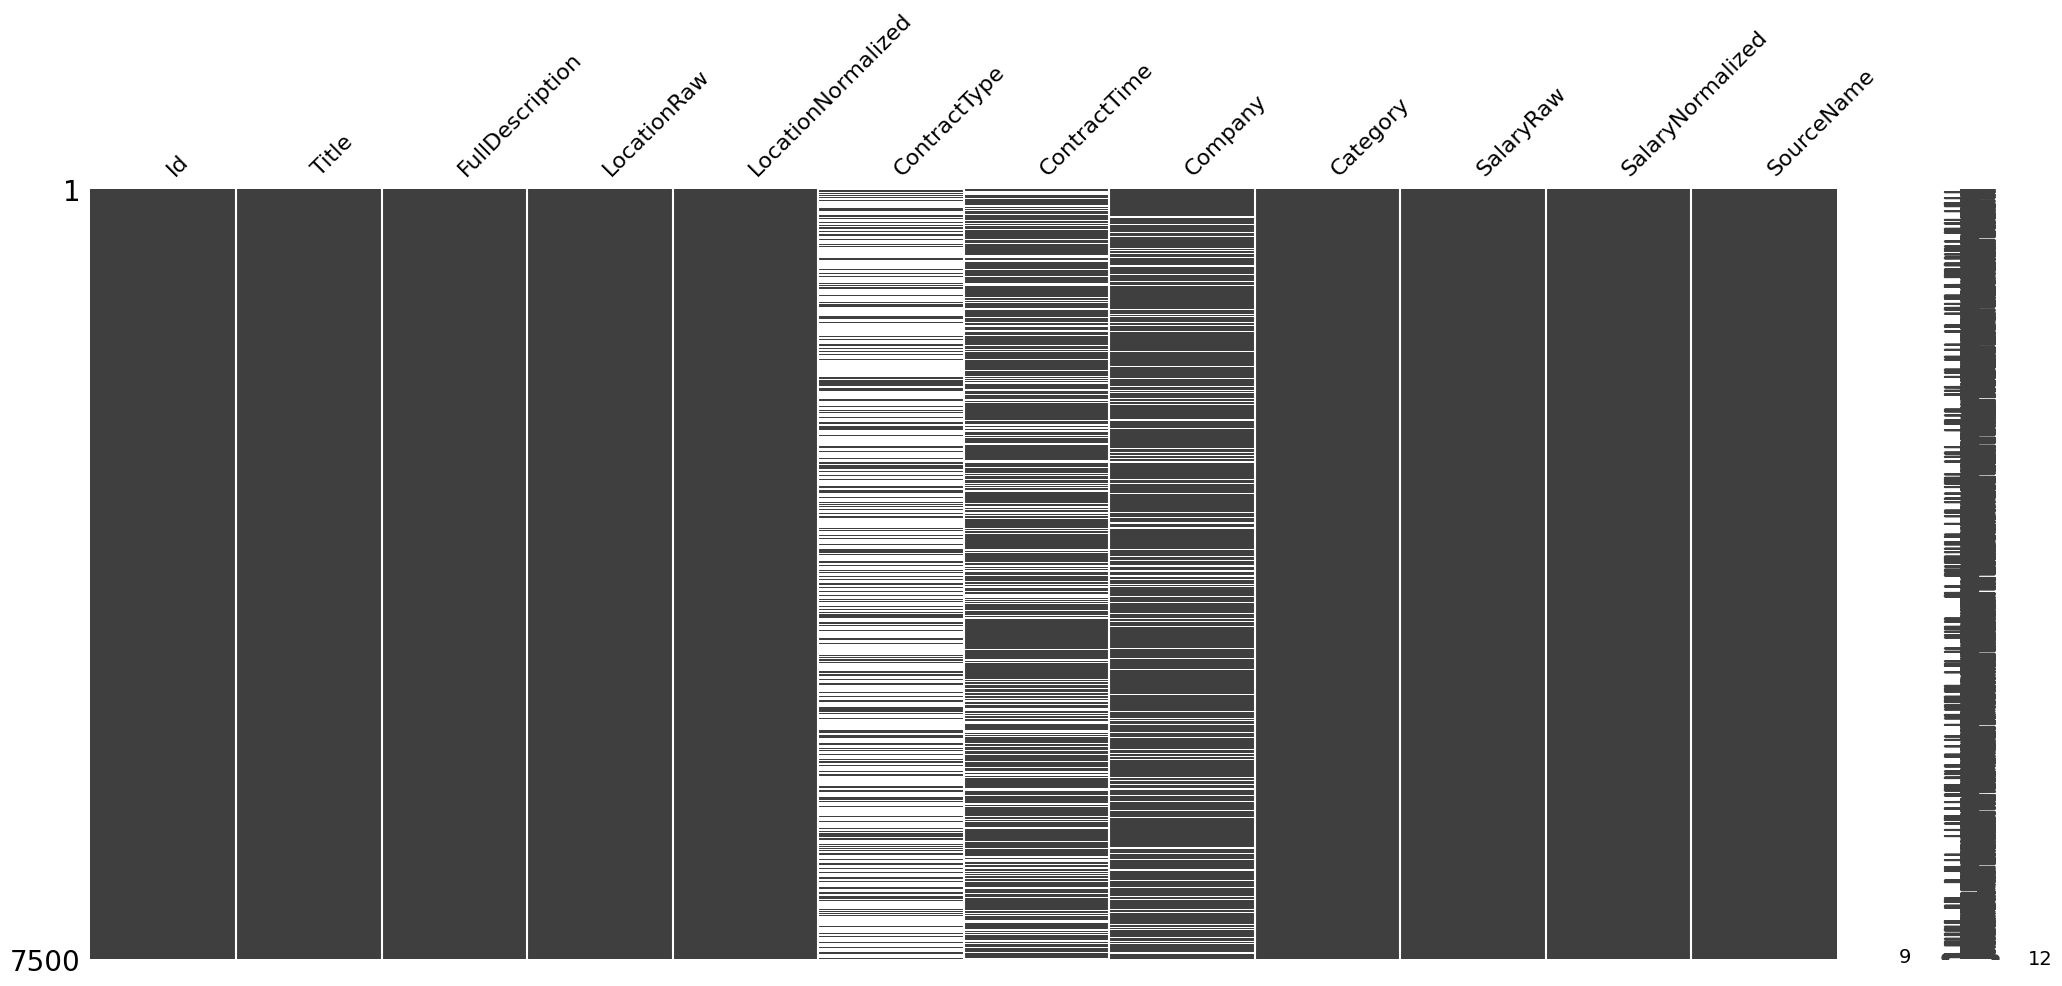

In [43]:
matrix(sub_df)

In [44]:
sub_df.isnull().sum()

Id                       0
Title                    0
FullDescription          0
LocationRaw              0
LocationNormalized       0
ContractType          5506
ContractTime          1930
Company                999
Category                 0
SalaryRaw                0
SalaryNormalized         0
SourceName               0
dtype: int64

In [45]:
sub_df.drop(columns=["ContractTime", "ContractType", "Company"], inplace=True)

In [46]:
# Assigning whether we are above or below 75th Percentile
sub_df['Percentile'] = sub_df['SalaryNormalized'].rank(pct = True)
sub_df.loc[sub_df['Percentile'] > 0.75, 'Target'] = 'Above'
sub_df.loc[sub_df['Percentile'] < 0.75, 'Target'] = 'Below'
sub_df.head()

,Id,Title,FullDescription,LocationRaw,LocationNormalized,Category,SalaryRaw,SalaryNormalized,SourceName,Percentile,Target
30390,68062598,Business Account Manager,Business Account Manager Plumbing Heating Pro...,South West,South West London,Sales Jobs,"22000 - 25000 per annum + Car,Mobile,Pension,L...",23500,totaljobs.com,0.312667,Below
108709,69622111,Staff Nurse RGN/RMN Newtown Abbey Nights Ne...,Job Title; Staff Nurse RGN/RMN â NightsLocat...,Newtownabbey,Newtownabbey,Healthcare & Nursing Jobs,12.00/Hour,23040,staffnurse.com,0.305267,Below
13924,66664026,Community Fundraising Manager,This dynamic international development charity...,London,London,Charity & Voluntary Jobs,33300 - 36400 per annum,34850,Third Sector Jobs,0.593067,Below
154606,71015241,Conveyancing Executive,Large regional law firm require a residential ...,Hampshire,Hampshire,Legal Jobs,"From 18,000 to 27,000 per year",22500,TotallyLegal,0.280533,Below
172891,71428553,Investment Compliance Analyst,This individual will work closely with the bus...,London South East,South East London,Accounting & Finance Jobs,50000 to 60000 per annum,55000,totaljobs.com,0.876333,Above


In [47]:
sub_df.value_counts('Category')

Category
IT Jobs                             1170
Engineering Jobs                     785
Accounting & Finance Jobs            661
Healthcare & Nursing Jobs            633
Other/General Jobs                   520
Sales Jobs                           504
Teaching Jobs                        365
Hospitality & Catering Jobs          358
PR, Advertising & Marketing Jobs     266
HR & Recruitment Jobs                253
Admin Jobs                           248
Trade & Construction Jobs            241
Retail Jobs                          218
Customer Services Jobs               215
Legal Jobs                           126
Social work Jobs                     122
Logistics & Warehouse Jobs           110
Manufacturing Jobs                   107
Consultancy Jobs                      99
Travel Jobs                           94
Charity & Voluntary Jobs              84
Scientific & QA Jobs                  79
Energy, Oil & Gas Jobs                55
Creative & Design Jobs                50
Mainten

In [48]:
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import nltk
import re

In [49]:
# Download NLTK resources (stopwords and tokenizer)
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Initialize stemmer
stemmer = PorterStemmer()

# Get English stop words
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\TYS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\TYS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\TYS\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [50]:
def pre_process(text):
    
    # lowercase
    text=str(text).lower()

    # remove numbers followed by dot (like, "1.", "2.", etc)
    text=re.sub('((\d+)[\.])', '', text)
    
    #remove tags
    text=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",text)
    
    # correct some misspellings and/or replace some text with others that might be easier to handle
    text=text.replace('do not', "don't")
    
    # remove special characters except spaces, apostrophes and dots
    text=re.sub(r"[^a-zA-Z0-9.']+", ' ', text)
    
    tokens = [word for word in text.split(' ') if word not in stop_words]
    lmtzr = WordNetLemmatizer()
    lemmatized_text = ' '.join(lmtzr.lemmatize(word) for word in tokens if word not in stop_words)
    
    
    return lemmatized_text

In [51]:
# Apply the basic preprocessing to the review column
sub_df['processed_FullDescription'] = sub_df['FullDescription'].apply(pre_process)

sub_df[['FullDescription', 'processed_FullDescription']].head()

,FullDescription,processed_FullDescription
30390,Business Account Manager Plumbing Heating Pro...,business account manager plumbing heating prod...
108709,Job Title; Staff Nurse RGN/RMN â NightsLocat...,job title staff nurse rgn rmn nightslocation n...
13924,This dynamic international development charity...,dynamic international development charity recr...
154606,Large regional law firm require a residential ...,large regional law firm require residential co...
172891,This individual will work closely with the bus...,individual work closely business interpreting ...


In [52]:
save_data(sub_df, "processed_rev1_7500.csv")